In [3]:
import sys

sys.path.append('..')

In [4]:
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

In [5]:
import logging

logging.basicConfig(level=logging.INFO)

In [6]:
from train_test_split import select_train, select_eval
from loading import load_test
from preprocessing import preprocess

[nltk_data] Downloading package stopwords to /Users/jonas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/jonas/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jonas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### prepare data

In [7]:
df_train = select_train(size=None)
df_train['type'] = 'train'
df_train

,index,text,label,type
0,157049,jennifer lawrence the queen of derp . <url>\n,1,train
1,2366208,airbake by wearever nonstick 15-1 / 2 by 20 - ...,0,train
2,1948945,apparently its main event time for #ufc145 . i...,0,train
3,1684769,<user> <user> i'll say it again ( about ko i l...,0,train
4,2262152,deep stall : the turbulent story of boeing com...,0,train
...,...,...,...,...
1249995,1500650,really wishing i could celebrate with <user> t...,0,train
1249996,1405608,"i love my mova lor rican ass . but , she don't...",0,train
1249997,839358,ahhh lovely night in with <user> love our one-...,1,train
1249998,254031,<user> if you were near-by i'd say came on ove...,1,train


In [8]:
df_eval = select_eval(size=None)
df_eval['type'] = 'eval'
df_eval

,index,text,label,type
0,922648,sunny day with my bff <user> <url>\n,1,eval
1,944379,"<user> also , that statement wasn't really dir...",1,eval
2,2182552,thoughts are with former dons striker lee mill...,0,eval
3,786886,- excitedd for my lil'mans party ! thanks to h...,1,eval
4,1130778,shout out to <user> xoxo\n,1,eval
...,...,...,...,...
1249995,1478680,"stylecraft 22 "" x 82 "" joined board and batten...",0,eval
1249996,1972646,<user> haha don't ask i'm ardent fan of barca ...,0,eval
1249997,1710597,<user> i know xx\n,0,eval
1249998,1835784,does anyone have an extra pair of headphones i...,0,eval


In [9]:
df_test = load_test(dir='../twitter-datasets', x_col='text')
df_test['type'] = 'test'
df_test

,text,type
1,sea doo pro sea scooter ( sports with the port...,test
2,<user> shucks well i work all week so now i ca...,test
3,i cant stay away from bug thats my baby\n,test
4,<user> no ma'am ! ! ! lol im perfectly fine an...,test
5,"whenever i fall asleep watching the tv , i alw...",test
...,...,...
9996,had a nice time w / my friend lastnite\n,test
9997,<user> no it's not ! please stop !\n,test
9998,not without my daughter ( dvd two-time oscar (...,test
9999,<user> have fun in class sweetcheeks\n,test


In [10]:
df = pd.concat([df_train, df_eval, df_test])
df['x'] = df['text']
df['x'] = df['x'].apply(lambda x: x.replace('\n', ''))
df

,index,text,label,type,x
0,157049.0,jennifer lawrence the queen of derp . <url>\n,1.0,train,jennifer lawrence the queen of derp . <url>
1,2366208.0,airbake by wearever nonstick 15-1 / 2 by 20 - ...,0.0,train,airbake by wearever nonstick 15-1 / 2 by 20 - ...
2,1948945.0,apparently its main event time for #ufc145 . i...,0.0,train,apparently its main event time for #ufc145 . i...
3,1684769.0,<user> <user> i'll say it again ( about ko i l...,0.0,train,<user> <user> i'll say it again ( about ko i l...
4,2262152.0,deep stall : the turbulent story of boeing com...,0.0,train,deep stall : the turbulent story of boeing com...
...,...,...,...,...,...
9996,NaN,had a nice time w / my friend lastnite\n,NaN,test,had a nice time w / my friend lastnite
9997,NaN,<user> no it's not ! please stop !\n,NaN,test,<user> no it's not ! please stop !
9998,NaN,not without my daughter ( dvd two-time oscar (...,NaN,test,not without my daughter ( dvd two-time oscar (...
9999,NaN,<user> have fun in class sweetcheeks\n,NaN,test,<user> have fun in class sweetcheeks


In [11]:
PREPROCESSING = {'remove_tags': True}

preprocess(df, flags=PREPROCESSING)
df

,index,text,label,type,x
0,157049.0,jennifer lawrence the queen of derp . <url>\n,1.0,train,jennifer lawrence the queen of derp .
1,2366208.0,airbake by wearever nonstick 15-1 / 2 by 20 - ...,0.0,train,airbake by wearever nonstick 15-1 / 2 by 20 - ...
2,1948945.0,apparently its main event time for #ufc145 . i...,0.0,train,apparently its main event time for #ufc145 . i...
3,1684769.0,<user> <user> i'll say it again ( about ko i l...,0.0,train,i'll say it again ( about ko i love that man ....
4,2262152.0,deep stall : the turbulent story of boeing com...,0.0,train,deep stall : the turbulent story of boeing com...
...,...,...,...,...,...
9996,NaN,had a nice time w / my friend lastnite\n,NaN,test,had a nice time w / my friend lastnite
9997,NaN,<user> no it's not ! please stop !\n,NaN,test,no it's not ! please stop !
9998,NaN,not without my daughter ( dvd two-time oscar (...,NaN,test,not without my daughter ( dvd two-time oscar (...
9999,NaN,<user> have fun in class sweetcheeks\n,NaN,test,have fun in class sweetcheeks


In [12]:
try:
    os.remove('tweets.txt')
except OSError:
    pass

f = open('tweets.txt', 'w')
for index, row in df.iterrows():
    f.write(row['x']+"\n")
f.close()

### embeddings

In [13]:
import fasttext

In [14]:
model = fasttext.train_unsupervised('tweets.txt', model='skipgram', dim=100)

Read 39M words
Number of words:  101528
Number of labels: 0
Progress: 100.0% words/sec/thread:  151993 lr:  0.000000 avg.loss:  1.268409 ETA:   0h 0m 0s


In [15]:
df['vec'] = df['x'].apply(model.get_sentence_vector)

In [16]:
df

,index,text,label,type,x,vec
0,157049.0,jennifer lawrence the queen of derp . <url>\n,1.0,train,jennifer lawrence the queen of derp .,"[0.054972325, 0.015952105, 0.011160461, 0.0006..."
1,2366208.0,airbake by wearever nonstick 15-1 / 2 by 20 - ...,0.0,train,airbake by wearever nonstick 15-1 / 2 by 20 - ...,"[0.075632006, 0.031144895, -0.017920982, 0.089..."
2,1948945.0,apparently its main event time for #ufc145 . i...,0.0,train,apparently its main event time for #ufc145 . i...,"[0.109389424, 0.0966143, -0.072018884, -0.0384..."
3,1684769.0,<user> <user> i'll say it again ( about ko i l...,0.0,train,i'll say it again ( about ko i love that man ....,"[0.07983561, 0.059911817, -0.08730044, -0.0572..."
4,2262152.0,deep stall : the turbulent story of boeing com...,0.0,train,deep stall : the turbulent story of boeing com...,"[0.032174982, -0.003617663, -0.012737507, 0.02..."
...,...,...,...,...,...,...
9996,NaN,had a nice time w / my friend lastnite\n,NaN,test,had a nice time w / my friend lastnite,"[0.13139519, 0.09366701, -0.07007073, -0.00244..."
9997,NaN,<user> no it's not ! please stop !\n,NaN,test,no it's not ! please stop !,"[0.08458825, 0.061480585, -0.09863631, -0.0413..."
9998,NaN,not without my daughter ( dvd two-time oscar (...,NaN,test,not without my daughter ( dvd two-time oscar (...,"[0.037836466, 0.012853058, -0.02890412, 0.0257..."
9999,NaN,<user> have fun in class sweetcheeks\n,NaN,test,have fun in class sweetcheeks,"[0.1296312, 0.12654555, -0.015126479, -0.02128..."


### clustering

In [17]:
# sum_of_squared_distances = []
# K = range(1,10)
# for k in tqdm(range(1, 10)):
#     km = KMeans(n_clusters=k)
#     km = km.fit(pd.DataFrame(df['vec'].values.tolist()))
#     sum_of_squared_distances.append(km.inertia_)

In [18]:
# plt.plot(K, sum_of_squared_distances, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Sum_of_squared_distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()

In [19]:
kmeans = KMeans(n_clusters=7)

In [20]:
df['cluster'] = kmeans.fit_predict(df['vec'].values.tolist())

In [21]:
df

,index,text,label,type,x,vec,cluster
0,157049.0,jennifer lawrence the queen of derp . <url>\n,1.0,train,jennifer lawrence the queen of derp .,"[0.054972325, 0.015952105, 0.011160461, 0.0006...",1
1,2366208.0,airbake by wearever nonstick 15-1 / 2 by 20 - ...,0.0,train,airbake by wearever nonstick 15-1 / 2 by 20 - ...,"[0.075632006, 0.031144895, -0.017920982, 0.089...",2
2,1948945.0,apparently its main event time for #ufc145 . i...,0.0,train,apparently its main event time for #ufc145 . i...,"[0.109389424, 0.0966143, -0.072018884, -0.0384...",0
3,1684769.0,<user> <user> i'll say it again ( about ko i l...,0.0,train,i'll say it again ( about ko i love that man ....,"[0.07983561, 0.059911817, -0.08730044, -0.0572...",5
4,2262152.0,deep stall : the turbulent story of boeing com...,0.0,train,deep stall : the turbulent story of boeing com...,"[0.032174982, -0.003617663, -0.012737507, 0.02...",1
...,...,...,...,...,...,...,...
9996,NaN,had a nice time w / my friend lastnite\n,NaN,test,had a nice time w / my friend lastnite,"[0.13139519, 0.09366701, -0.07007073, -0.00244...",0
9997,NaN,<user> no it's not ! please stop !\n,NaN,test,no it's not ! please stop !,"[0.08458825, 0.061480585, -0.09863631, -0.0413...",3
9998,NaN,not without my daughter ( dvd two-time oscar (...,NaN,test,not without my daughter ( dvd two-time oscar (...,"[0.037836466, 0.012853058, -0.02890412, 0.0257...",1
9999,NaN,<user> have fun in class sweetcheeks\n,NaN,test,have fun in class sweetcheeks,"[0.1296312, 0.12654555, -0.015126479, -0.02128...",0


In [22]:
df.groupby('cluster')['label'].value_counts()

cluster  label
0        0.0      293432
         1.0      257716
1        0.0      205664
         1.0       21078
2        0.0      161322
         1.0        3507
3        1.0      199174
         0.0       42471
4        1.0      408834
         0.0      222784
5        1.0      359671
         0.0      298848
6        0.0       25479
         1.0          20
Name: label, dtype: int64

In [24]:
df[df['type'] == 'train'][['index', 'cluster']].to_csv('train.csv')

In [25]:
df[df['type'] == 'eval'][['index', 'cluster']].to_csv('eval.csv')

In [26]:
df[df['type'] == 'test'][['index', 'cluster']].to_csv('test.csv')

### visualize clustering

In [27]:
pca = PCA(n_components=3)
res = pca.fit_transform(df['vec'].values.tolist())

df['coord_x'] = res[:,0]
df['coord_y'] = res[:,1]
df['coord_z'] = res[:,2]

print(pca.explained_variance_ratio_)

[0.23542327 0.06226656 0.03995704]


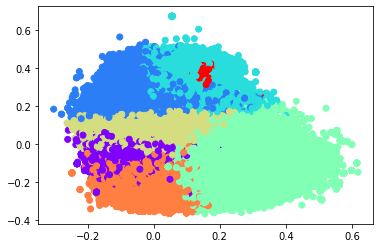

In [28]:
plt.scatter(df['coord_y'], df['coord_x'], c=df['cluster'], cmap='rainbow')

/var/folders/gq/4c0zg0rx0pv4n82cfglq0vb00000gn/T/ipykernel_38356/1593339746.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)


Text(0.5, 0.92, 'Tweet Clustering using K Means')

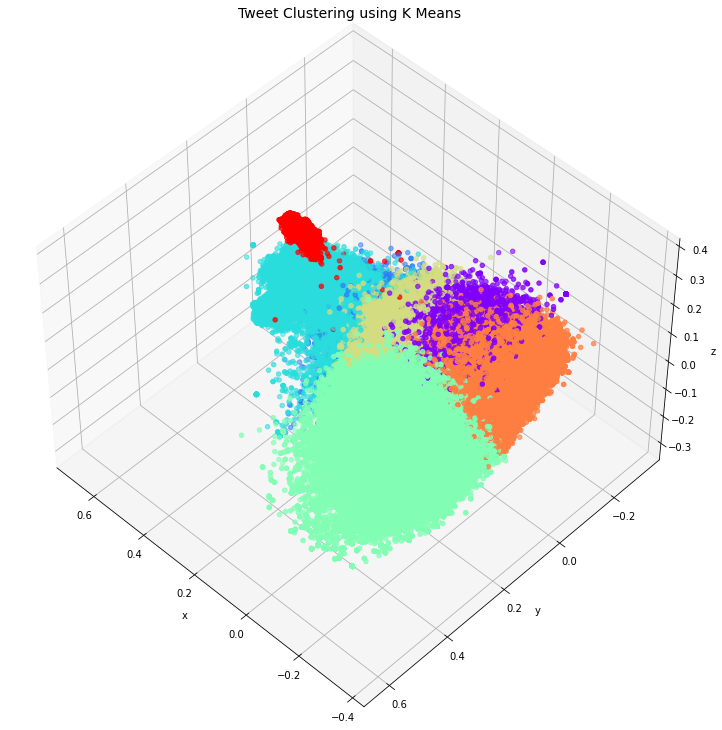

In [29]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(10,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(df['coord_x'], df['coord_y'], df['coord_z'], c=df['cluster'], cmap='rainbow')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_facecolor('white')
plt.title("Tweet Clustering using K Means", fontsize=14)